# Project 1 - Quality control for a clock manufacturing company [40 marks]

---

Make sure you read the instructions in `README.md` before starting! In particular, make sure your code is well-commented, with sensible structure, and easy to read throughout your notebook.

---

There is an imaginary clock manufacturing company that wants you to develop software to check the quality of its products. The clocks produced by this company have **two hands**:

- the small hand is **red** and indicates the **hour**,
- the long hand is **green** and indicates the minutes.

We refer to these as *the hour hand* and *the minute hand* respectively. These clocks do not have any other hands (although some other clocks have a third hand indicating the seconds).

It is very important for these hands to be properly aligned. For example, if the hour hand is pointing to the hour `3` (being horizontal and pointing toward right), the minute hand should be pointing toward the hour `12` (vertical and pointing upward). Another example is when the hour hand is pointing to the hour `1:30` (making a 45 degree angle from the vertical line), the minute hand should be pointing toward hour `6` (vertical and downward).

| Correct `1:30`, the hour hand is halfway between 1 and 2. | Incorrect `1.30`, the hour hand is too close to 1. |
|:--:|:--:|
| ![Correct 1.30](graphics/one_thirty_correct.png) | ![Incorrect 1.30](graphics/one_thirty_incorrect.png) |

Due to production imprecisions, this is not the case all the time. Your software package will **quantify the potential misalignments** and help the company to return the faulty clocks back to the production line for re-adjustment.

You will achieve this goal in several steps during this project. Most steps can be done independently. Therefore, if you are struggling with one part, you can move on to other tasks and gain the marks allocated to them.

For most tasks, under "✅ *Testing:*", you will be given instructions on how to check that your function works as it should, even if you haven't done the previous task.


---

## Task 1: Reading images into NumPy arrays [3 marks]

The company takes a picture of each clock, and saves it as a PNG image of 101x101 pixels. The folder `clock_images` contains the photos of all the clocks you need to control today.

In a PNG colour image, the colour of each pixel can be represented by 3 numbers between 0 and 1, indicating respectively the amount of **red**, the amount of **green**, and the amount of **blue** needed to make this colour. This is why we refer to colour images as **RGB** images.

- If all 3 values are 0, the pixel is black.
- If all 3 values are 1, the pixel is white.
- If all 3 values are the same, the pixel is grey. The smaller the values, the darker it is.
- Different amounts of red, green, and blue correspond to different colours.

For example, select a few colours [using this tool](https://doc.instantreality.org/tools/color_calculator/), and check the RGB values for that colour in the *RGB Normalized decimal* box. You should see that, for instance, to make yellow, we need a high value of red, a high value of green, and a low value of blue.

If you'd like more information, [this page](https://web.stanford.edu/class/cs101/image-1-introduction.html) presents a good summary about RGB images.

---

🚩 Study the [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.html) for the functions `imread()` and `imshow()` from `matplotlib.pyplot`. Then, write code below to read the `clock_0` image from `batch_0` into a NumPy array, and display the image.

You will obtain a NumPy array with shape `(101, 101, 3)`, i.e. an array which is 3 layers deep. Each of these layers is a 101x101 array, where the elements represent the intensity of red, green, and blue respectively, for each pixel. For example, the element of this array with index `[40, 20, 2]` corresponds to the amount of blue in the pixel located in row 40, column 20.

Create a second figure, with 3 sets of axes, and use `imshow()` to display each layer separately on its own set of axes. Label your figures appropriately to clearly indicate what each image is showing.

*Note: you can use `ax.imshow()` to display an image on the axes `ax`, the same way we use `ax.plot()`.*

(-0.5, 100.5, 100.5, -0.5)

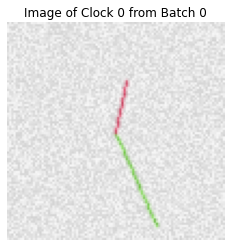

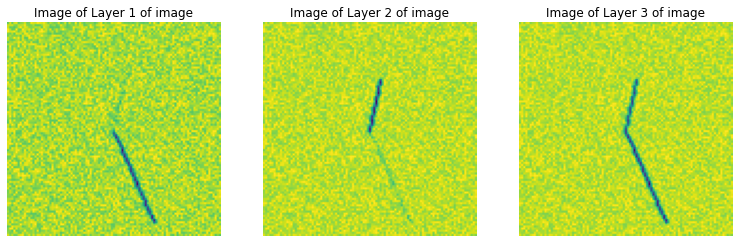

In [39]:
#The line of code below the matplotlib and numpy libraries
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np

#The code below reads the image from the folder where clock 0 from batch 0 is saved and retirn the numpy array
#of dimensions [101, 101, 3]
image_clock_0 = '/Users/jamesjoseph/OneDrive - University of Edinburgh/Python Programming/Individual_Project/pp-project-1-James2258876/clock_images/batch_0/clock_0.png'
image = mpimg.imread (image_clock_0)

#This code displays the image of the original clock
plt.imshow(image)
plt.title("Image of Clock 0 from Batch 0") #gives a title
plt.axis('off')                            #hides the axes

#The code below extracts each layer from the array "image" by extracting the same element across from each row and
#column from the numpy array "image". Each extacted element corresponds to the value of the RGB code in a pixel. 
level_1_image = image[:, :, 0]
level_2_image = image[:, :, 1]
level_3_image = image[:, :, 2]

#The code below plots the original image and the image of each layer corresponding to the value from each layer
#of the RGB code. The image is displayed in three sub-plots in single line plot
fig, ax = plt.subplots(1, 3, figsize=(13, 13))

#The code below does the following
#Displays the image in each sub-plot
ax[0].imshow(level_1_image)
ax[1].imshow(level_2_image)
ax[2].imshow(level_3_image)

#Adds the title for each image in the sub-plot
ax[0].set_title("Image of Layer 1 of image")
ax[1].set_title("Image of Layer 2 of image")
ax[2].set_title("Image of Layer 3 of image")

#Hides the axes to just display the image
ax[0].axis('off')
ax[1].axis('off')
ax[2].axis('off')

#Code credit
#Matplotlib Documentation
#Stack Overflow searchboards to refine the code

---
## Task 2: Clean up the images to extract data [6 marks]

Later in Task 3, we will use **linear regression** to find the exact position of both clock hands. To perform linear regression, we will need the **coordinates of the pixels** belonging to each hand; then, we will be able to fit a line through these pixels.

This task is concerned with extracting the correct pixel coordinates from the image.

---

🚩 Write a function `get_clock_hands(clock_RGB)`, which takes one input argument `clock_RGB`, a NumPy array of size 101x101x3 representing an RGB image of a clock, and returns 2 NumPy arrays with 2 columns each, such that:

- In the first array, each row corresponds to the `[row, column]` index of a pixel belonging to the **hour hand**.
- In the second array, each row corresponds to the `[row, column]` index of a pixel belonging the **minute hand**.

The goal is to obtain, for each hand, a collection of `[row, column]` coordinates which indicate where on the picture is the clock hand. You will need to figure out a way to decide whether a given pixel belongs to the hour hand, the minute hand, or neither.


---

***Important note:*** the pictures all contain some amount of noise and blur. Depending on how you decide to count a certain pixel or not as part of a clock hand, your function will pick up different pixels. There isn't just one possible set of pixel coordinates to pick up for a given image -- the most important thing is that the pixels you extract **only** belong to one of the two hands, and not to the background for example. This will ensure that you can use linear regression efficiently.

---

✅ *Testing:* For example, for the tiny 7x7 clock below (a 7x7 pixel image is available in the `testing` folder for you to try your function):

| Clock | Hour hand | Minute hand |
|:--:|:--:|:--:|
| <img src="graphics/task2.png" alt="Task 2 example" style="width: 100px;"/> | [[1, 1]<br/> [2, 2]] | [[3, 3]<br/> [4, 3]<br/> [4, 4]<br/> [5, 4]<br/> [6, 5]] |

(array([[49, 48],
       [49, 49],
       [49, 50],
       [49, 51],
       [50, 48],
       [50, 49],
       [50, 50],
       [50, 51],
       [50, 52],
       [50, 53],
       [51, 49],
       [51, 50],
       [51, 51],
       [51, 52],
       [51, 53],
       [51, 54],
       [51, 55],
       [51, 56],
       [52, 50],
       [52, 51],
       [52, 52],
       [52, 53],
       [52, 54],
       [52, 55],
       [52, 56],
       [52, 57],
       [52, 58],
       [53, 52],
       [53, 53],
       [53, 54],
       [53, 55],
       [53, 56],
       [53, 57],
       [53, 58],
       [53, 59],
       [53, 60],
       [53, 61],
       [54, 55],
       [54, 56],
       [54, 57],
       [54, 58],
       [54, 59],
       [54, 60],
       [54, 61],
       [54, 62],
       [54, 63],
       [54, 64],
       [55, 57],
       [55, 58],
       [55, 59],
       [55, 60],
       [55, 61],
       [55, 62],
       [55, 63],
       [55, 64],
       [55, 65],
       [55, 66],
       [56, 60],
       [56, 6

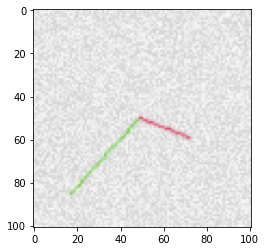

In [53]:
def get_clock_hands (clock_RGB):
    '''
    This function extracts the correct pixel coordinates from the image in [row, column] format 
    which indicate where on the picture is the clock hand.
    '''
    import matplotlib.pyplot as plt
    import matplotlib.image as mpimg
    import numpy as np
    
    image = mpimg.imread (clock_RGB)
    #This code displays the image of the original clock
    plt.imshow(image)

    #Initiate an empty list for the hour hand array and minute hand array to be populated in the output
    hour_hand_list = []
    minute_hand_list = []
    
    #Code checks the colour code in each pixel to identify the row and column reference for 
    #a successful identification
    for i in range(0, 101):       #searching across all rows where pixel size is 101 X 101 i.e. 101 rows
        for j in range (0, 101):  #searching across all columns where pixel size is 101 X 101 i.e. 101 rows
            
            #The colour code is in RGB format with each layer a code for Red, Green or Blue
            #1st element is red and 2nd element is green. The code checks only for these two colours 
            #since red indicates hour hand and green indicates minute hand. All other colours are ignored.
            
            R = image [i, j, 0]   
            G = image [i, j, 1]
            B = image [i, j, 2]
            
            # If all 3 values (RGB) are 0, the pixel is black. If all 3 values are 1, the pixel is white.
            #If all 3 values are the same, the pixel is grey. All othe combinations denote a colour. So the code 
            #checks for the conditions where it is not black , grey or white.
            if R != G != B:
                if max(R, G, B) == R:              #if the RGB code is the highest for red, then marked as red colour
                    hour_hand_list.append([i, j])  #list is populated with the pixel row and column reference
                                
                elif max(R, G, B) == G:            # if the RGB code is highest for green, then marked as green colour
                    minute_hand_list.append([i, j])#list is populated with the pixel row and column reference
    
    #Convert list into an array            
    hour_hand_arr = np.array (hour_hand_list)
    minute_hand_arr = np.array (minute_hand_list)

    return (hour_hand_arr, minute_hand_arr)

#Test Result
clock_RGB = '/Users/jamesjoseph/Documents/batch_4/clock_4.png'
print(get_clock_hands (clock_RGB))

---

## Task 3: Calculate the angle of the two hands [9 marks]

Now that we have pixel locations for each hand, we can estimate the **angle** between each hand and the 12 o'clock position. We will use this angle later to determine the time indicated by each hand. For instance, the figure below shows the angle made by the hour hand with the 12 o'clock position.

![Angle between hour hand and 12 o'clock](graphics/angle.png)

---

🚩 Write a function `get_angle(coords)` which takes one input argument, a NumPy array with 2 columns representing `[row, column]` pixel coordinates of one clock hand, exactly like one of the arrays returned by `get_clock_hands()` from Task 2.

- Your function should use these pixel coordinates to find a **line of best fit** using linear regression.
- Then, using this line of best fit, you should determine and **return** the angle between the clock hand and the 12 o'clock position, measured in **radians**.

The angle should take a value between $0$ (inclusive) and $2\pi$ (exclusive) radians, where $0\, \text{rad}$ corresponds to the 12 o'clock position.

---

***Notes:***

- When performing linear regression, you will need to pay particular attention to the case where the clock hand is vertical or almost vertical.
- Beware of the correspondance between `[row, column]` index and `(x, y)` coordinate for a given pixel.
- Note that the meeting point of the 2 clock hands may not be exactly at `[50, 50]`. Some of the pictures have a small offset.
- Partial attempts will receive partial marks. For instance, if you are struggling with using linear regression, or if you don't know how to account for possible offset of the centre, you may receive partial marks if you use a simpler (but perhaps less accurate) method.

---

✅ *Testing:* the files `task3_hourhand.txt` and `task3_minutehand.txt` are provided for you to test your function in the `testing` folder. Use `np.loadtxt()` to read them.

With these coordinates, you should find an angle of approximately 4.2 radians for the hour hand, and 5.7 radians for the minute hand.

In [54]:
def get_angle(coords):
    '''
    
    This function takes one input argument, a NumPy array with 2 columns representing [row, column] pixel 
    coordinates. The function uses these pixel coordinates to find a line of best fit using linear regression.
    Then, using this line of best fit, the function determines and returns the angle between the line
    of best fit and the y-axis, measured in radians.
    
    '''
    
    %matplotlib inline
    import numpy as np
    
    #global angle
        
    # pixel size is assumed to be 101 X 101 as per Task 1
    pixel_max_size = 101                              
    
    # The array input is a 2-D array of pixel reference for rows and columns with number of rows identifying the
    #number of points
    array_tot_rows, array_tot_cols = coords.shape     
    
    #Pulls out the row coordinates and column coordinates into seperate arrays. The size is set to the number of rows
    #those are the number of pixels we receive as input
    array_row_coord = coords[:, 0]
    array_col_coord = coords[:, 1]
    
    #Initiate an array of zeroes - equivalent to an empty array
    x_coord = np.zeros(array_tot_rows)
    y_coord = np.zeros(array_tot_rows)
    
    #This code converts the row column reference into cartesian coordinates (x-y coordinates)
    #The column reference will be the x-ccordinate and the row reference will be the y-coordinate
    #The array origin is the top-left box (0,0). The origin for the x-y axes needs to be the centre of the array.
    #Since pixel size is 101 X 101, the origin is equivalent to (50,50) array reference.
    #for X axes - the col reference above 50 will the positive value and the ones below 50 will be negative.
    #This will be reversed for the y-axis since the values less than 50 correspond to the positive value on the y-axis.
    for i in range(0, array_tot_rows):
        x_coord[i] = array_col_coord[i] - ((pixel_max_size -1) / 2)
        y_coord[i] = -1 * (array_row_coord[i] - ((pixel_max_size - 1) / 2))
    
    #This is the function numpy.polyfit for line of best fit
    slope, intercept = np.polyfit(x_coord, y_coord, 1)
    #The line of best gives the sliope and intercept, however, given the pixels, the line of best fit may not pass through
    #origin (50,50) or (0,0). The intercept is then set to zero to move the line of best pararlley and to pass through the
    #origin.
    y_coord_reg = slope * x_coord
    
    #Pick a point to calculate the angle. This is the last element in the array.
    point_x_coord = x_coord[array_tot_rows - 1]
    point_y_coord = y_coord_reg[array_tot_rows - 1]
    
    #The angle with respect to the x-axis is calculate dusing the numpy arctan function.
    calc_angle = np.arctan2(point_y_coord, point_x_coord) 
    
    #The arc tan function gives the angle between the x-axis and a line. Since we have to calculate the angle against
    #12'o' clock line or the positive y-axis. These conditions check the quadrant in which the point lies. 
    #Subsequnetly it then adjusts the angle calculation assuimg each quadrant is pi/2 radians and the angle betwwen the lines
    # x = 0 for all value x>=0 and x = 0 for all value os x<0 as pi radians.
    if point_x_coord > 0 and point_y_coord > 0:   #Check in the first quadrant
        angle = np.pi / 2 - calc_angle            # Q1 angle (pi/2) - angle from arctan

    elif point_x_coord > 0 and point_y_coord < 0: #Check in the fourth quadrant
        angle = np.pi / 2 - calc_angle            # Q1 angle (pi/2) + angle from arctan (negative angle)

    elif point_x_coord < 0 and point_y_coord > 0: #Check in the second quadrant
        angle = ((5 * np.pi) / 2) - calc_angle    #Q1 + Q2 + Q3 angle + (Q1 + Q2 angle - arctan angle)

    elif point_x_coord < 0 and point_y_coord < 0: #Check in the third quadrant
        angle = np.pi / 2 - calc_angle            #Q1 angle + arctan angle (negative angle)

    elif point_x_coord == 0 and point_y_coord > 0: #angle for x = 0 is the y-axis where y > 0 - hence angle =0
        angle = 0

    elif point_x_coord > 0 and point_y_coord == 0: #angle for y =0 is the x-axis where x > 0 - hence angle is pi/2
        angle = np.pi / 2
    
    elif point_x_coord == 0 and point_y_coord < 0: #angle for x = 0 is the y-axis where y < 0 - hence angle = 2 * pi/2 = pi
        angle = np.pi

    elif point_x_coord < 0 and point_y_coord == 0: #angle for y =0 is the x-axis where x < 0 - hence angle = # * pi/2 
        angle = 3 * (np.pi / 2)

    return (angle)

#Test Result
clock_RGB = '/Users/jamesjoseph/Documents/batch_4/clock_4.png'
image_coords = get_clock_hands (clock_RGB)
hour_coords = image_coords[0]
min_coords = image_coords[1]
print (get_angle(hour_coords), get_angle(min_coords))


1.9376221140287477 3.887237570871607


---

## Task 4: Visualising the clock [6 marks]

🚩  Use `matplotlib` and your artistic skills to visualise the clock. Write a function `draw_clock(angle_hour, angle_minute)` that takes 2 input arguments, corresponding to the two angles of the clock hands, and draw a clock with the precise location of both hands.

Your plot may include the number associated to hours, a background like a circle, an arrow head for each hand etc.

---

✅ *Testing:* with `angle_hour` set to $\frac{\pi}{3}$ and `angle_minute` set to $\frac{11\pi}{6}$, the hour hand should point exactly at 2, and the minute hand should point exactly at 11.

There is also an example image in the `testing` folder, which was produced entirely with `matplotlib`. This is just to give you an idea of what is possible to do -- you shouldn't attempt to reproduce this particular example, don't hesitate to get creative!

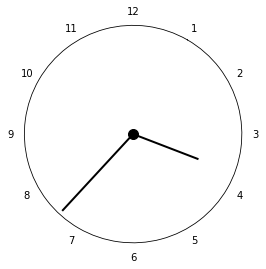

In [55]:
def draw_clock(angle_hour, angle_minute):
    '''
    This function takes 2 input arguments, corresponding to the two angles of the clock hands, 
    and draw a clock with the precise location of both hands.
    '''
    %matplotlib inline
    import numpy as np
    import matplotlib.pyplot as plt

    #Set the clock frame by using the example of a polar plot from the matplotlib documentation - code used from the 
    #example. The original code was edited to remove the radial line and grids.
    r = np.arange(0, 2, 0.01)
    theta = 2 * np.pi * r

    fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
    ax.set_rmax(2)
    ax.set_yticklabels([])
    ax.grid (False)

    # Set the circumference labels
    ax.set_xticks(np.linspace(0, 2*np.pi, 12, endpoint=False)) #convert degree labels into numbers
    ax.set_xticklabels(range(1, 13))                           #display range from 1 to 12 on the circumference
    ax.set_theta_direction (-1)                                #offset the 0 degrees to the top
    ax.set_theta_offset (np.pi/3.0)                            #set offset in radians
    ax.grid (False)                                            #remove grid lines
    
    #adjust the angle inputs to adjust for the range used
    angle_hour_adj = angle_hour - np.pi / 6
    angle_minute_adj = angle_minute - np.pi / 6
    
    #plot the lines from the angle
    ax.plot([angle_hour_adj, angle_minute_adj], [0,0.9], 'k', linewidth=2)
    ax.plot([angle_hour_adj, angle_hour_adj], [0,0.6], 'k', linewidth=2)
    ax.plot(0, 0, 'o', markersize=10, markerfacecolor='k', markeredgecolor='k')

    plt.show()
    
    #Sources referred: 
    #1. Polar Plot from mathplot lib documentation
    #2. Buidling an analoog clock from current time by Yefeng Xia
    #3. Stack oveflow and other blogposts
    
#Test Result
clock_RGB = '/Users/jamesjoseph/Documents/batch_4/clock_4.png'
image_coords = get_clock_hands (clock_RGB)
hour_coords = image_coords[0]
min_coords = image_coords[1]

draw_clock(get_angle(hour_coords), get_angle(min_coords))

---
## Task 5: Analog to digital conversion [5 marks]

🚩 Write a function `analog_to_digital(angle_hour, angle_minute)` that takes two input arguments, corresponding to the angles formed by each hand with 12 o'clock, and returns the time in digital format. More specifically, the output is a string showing the time in hour and minute in the format `hh:mm`, where `hh` is the hour and `mm` is the minute.

- When the hour is smaller than 10, add a leading zero (e.g. `04:30`).
- When the hour is zero, display `12`.

At this point, your function is not concerned about the imprecision. It should calculate the hour from the hour hand, and the minute from the minute hand, separately.

---
✅ *Testing:* the same angles as in Task 4 should give you `02:55`.

In [57]:
def analog_to_digital(angle_hour, angle_minute):
    '''
    This function takes two input arguments, corresponding to the angles formed by each hand with 12 o'clock,
    and returns the time in digital format. More specifically, the output is a string showing the time in hour
    and minute in the format hh:mm, where hh is the hour and mm is the minute.
    '''
    
    import numpy as np
    
    #The "clock" can be divided into 12 sections of angles pi/6 each. At any time the hour hand will lie within the arc
    #The hour time will correspond to the section number in which the hour hand is. For example at 02: 55 the hour hand
    # will be the angle bound by the clock label 2 and 3 and takes the value 2.
    for i in range(0, 12):
        if angle_hour >= i * (np.pi / 6) and angle_hour < (i + 1) * (np.pi / 6):
            hour_calc = i
    
    #Adjusted for output i.e the hour is zero hours it corresponds to 12.
    if hour_calc == 0:
        hour = 12
    elif hour_calc < 10:
        hour = '0' + str(hour_calc)
    else:
        hour = hour_calc
    
    # The "clock" can be divided into 60 sections of angles pi/30 each. At any time the minute hand will lie 
    # in one of the sections. The minute time will correspond to the section number in which the minute hand is. 
    # For example at 02: 55 the hour hand will be the angle bound by the clock label 55 and 56 and takes the value 55.
    for i in range(0, 60):
        if angle_minute >= i * (np.pi / 30) and angle_minute < (i + 1) * (np.pi / 30):
            min_calc = i
    
    #Adjusted for output.
    if min_calc < 10:
        mins = '0' + str(min_calc)
    else:
        mins = min_calc
    
    time = str(hour) + ':' + str(mins)

    return (time)

#Test Result
clock_RGB = '/Users/jamesjoseph/Documents/batch_4/clock_4.png'
image_coords = get_clock_hands (clock_RGB)
hour_coords = image_coords[0]
min_coords = image_coords[1]

analog_to_digital(get_angle(hour_coords), get_angle(min_coords))

'03:37'

---
## Task 6: Find the misalignment [5 marks]

Now that you have extracted useful information from the pictures, you need to check if the two hands are aligned properly. To do so, you will need to find the exact time that the **small hand** is showing, in hours and minutes. Then, compare with the minutes that the big hand is showing, and report the difference.

Note that the misalignment will never be more than 30 minutes. For example, if you read a 45-minute difference between the minutes indicated by the hour hand and by the minute hand, you can realign the minute hand by 15 minutes in the other direction instead.

---

🚩 Write a function `check_alignment(angle_hour, angle_minute)` which returns the misalignment in minutes.

Make sure you structure you code sensibly. You may wish to use some intermediate functions to do the sub-tasks.

---
✅ *Testing:* the same angles as in Task 4 should give you a 5-minute misalignment.

In [58]:
def check_alignment(angle_hour, angle_minute):
    '''
    This function checks if the two hands are aligned properly. To do so, the function find the time based on
    the hour hand in hours and minutes. This is then compared with the minutes corresponding to the minute hand. 
    The misalignment or the difference is calculated. 
    
    Note that the misalignment will never be more than 30 minutes. For example, if the function calculates a 
    a 45-minute difference between the minutes indicated by the hour hand and by the minute hand, the minute hand
    is re-aligned hand by 15 minutes in the other direction instead.
    '''
    
    import numpy as np

    #The "clock" can be divided into 12 sections of angles pi/6 each. At any time the hour hand will lie within the arc
    #The hour time will correspond to the section number in which the hour hand is. For example at 02: 55 the hour hand
    # will be the angle bound by the clock label 2 and 3 and takes the value 2.
    for i in range(0, 12):
        if angle_hour >= i * (np.pi / 6) and angle_hour < (i + 1) * (np.pi / 6):
            hour_calc = i
    
    #The "hour section" above is divided into 60 parts where the hour hand moves per minute. Since the angles are with
    #to the 12'o' clock line, the hours passed are subtracted to determine the section in which the hour has covered.
    #So for 02:55 pm, the hour hand has covered the first section (pi/6) and covered 55/60 of the next section to
    #denote 55 minutes. This is claculated based on the angle hour input less the full hour sections covered.
    min_hr_angle = angle_hour - (hour_calc * np.pi / 6)
    
    #Each section of the hour (pi/6) is divided into 60 parts i.e. pi/ 360. The same logic as that for the minute hand
    #angle based on the position of the hour hand location is applied.
    for i in range(0, 60):
        if min_hr_angle >= i * (np.pi / 360) and min_hr_angle < (i + 1) * (np.pi / 360):
            min_hr_calc = i
    
    #Adjusted for output.
    if min_hr_calc == 0:
        min_hr = 60
    else:
        min_hr = min_hr_calc
    
    # The "clock" can be divided into 60 sections of angles pi/30 each. At any time the minute hand will lie 
    # in one of the sections. The minute time will correspond to the section number in which the minute hand is. 
    # For example at 02: 55 the hour hand will be the angle bound by the clock label 55 and 56 and takes the value 55.
    for i in range(0, 60):
        if angle_minute >= i * (np.pi / 30) and angle_minute < (i + 1) * (np.pi / 30):
            min_calc = i
    
    #Adjusted for output.
    if min_calc == 0:
        mins = 60
    else:
        mins = min_calc
    
    #Caluclate misalignment
    misalignment = mins - min_hr
    
    #Alignment capped at 30 minutes and moved to 30 minutes in case it exceeds 
    if misalignment > 30:
        #The minute hand position is moved by the excess "angle" over 30 minutes
        adj_angle_minute = angle_minute - ((diff - 30) * 2 * (np.pi / 60)) 
        angle_minute = adj_angle_minute
        #mislaignment set to 30 minutes
        misalignment = 30
        
    return (misalignment)

#Test Result
clock_RGB = '/Users/jamesjoseph/Documents/batch_4/clock_4.png'
image_coords = get_clock_hands (clock_RGB)
hour_coords = image_coords[0]
min_coords = image_coords[1]

check_alignment(get_angle(hour_coords), get_angle(min_coords))

-5

---
## Task 7: Putting it all together [6 marks]

Now that you have successfully broken down the problem into a sequence of sub-tasks, you need to combine all the above steps in one function.

🚩 Write a function `validate_clock(filename)` that takes the name of an image file (a picture of a clock face) as an input argument, and returns the misalignment in minutes as an integer.

Then, write a function `validate_batch(path, tolerance)` which takes 2 input arguments: `path`, a string to indicate the path of a folder containing a batch of clock pictures, and `tolerance`, a positive integer representing the maximum tolerable number of minutes of misalignment for a clock to pass the quality control check.

Your `validate_batch()` function should write a .txt file called `batch_X_QC.txt` (where `X` should be replaced by the batch number), containing the following information:

```
Batch number: [X]
Checked on [date and time]

Total number of clocks: [X]
Number of clocks passing quality control ([X]-minute tolerance): [X]
Batch quality: [X]%

Clocks to send back for readjustment:
clock_[X]   [X]min
clock_[X]   [X]min
clock_[X]   [X]min
[etc.]
```

The square brackets indicate information which you need to fill in.

- You will need to check all pictures in the given folder. You may wish to use Python's `os` module.
- The date and time should be the exact date and time at which you performed the validation, in the format `YYYY-MM-DD, hh:mm:ss`. You may wish to use Python's `datetime` module.
- The batch quality is the percentage of clocks which passed the quality control in the batch, rounded to 1 decimal place. For example, in a batch of 20 clocks, if 15 passed the control and 5 failed, the batch quality is `75.0%`.
- List all clock numbers which should be sent back for realignment, in **decreasing order of misalignment**. That is, the most misaligned clock should appear first.
- The list of clocks to send back and the misalignment in minutes should be vertically aligned, in a way which makes the report easy to read. Check the example in the `testing` folder.
- Your function should not return anything, simply write the .txt report.

For instance, to use your function to check batch 1 with a 2-minute maximum acceptable misalignment, the command will be `validate_batch('clock_images/batch_1', 2)`.

---

✅ *Testing:* There is an example report in the `testing` folder (for a batch which you do not have), to check that your report is formatted correctly.

---

🚩 Use your function `validate_batch()` to generate quality control reports for the 5 batches of clocks provided in the `clock_images` folder, with a tolerance of 3 minutes.

Your reports should all be saved in a folder called `QC_reports`, which you should create using Python. You should generate all 5 reports and include them in your submission.


In [52]:
def validate_clock(filename):
    '''
    This function takes the name of an image file (a picture of a clock face) as an input argument, 
    and returns the misalignment in minutes as an integer.
    '''

    get_clock_hands (filename)

    image_coords = get_clock_hands (filename)

    angle_hour = get_angle(image_coords[0])
    angle_minute = get_angle(image_coords[1])

    return (check_alignment(angle_hour, angle_minute))

In [51]:
from os import listdir
from os.path import isfile, join
import datetime

def validate_batch(path, tolerance):
    
    batch_number = int(input('Enter your name: '))

    list_files = [f for f in listdir(path) if isfile(join(path, f))]
    list_files.remove('.DS_Store')

    num_clocks_batch = len(list_files)

    clock_list = []
    fail_list = []
    num_fail = 0

    for i in range (0, num_clocks_batch):
        filename = path + '/' + list_files[i]
        misalignment = validate_clock(filename)
    
        if misalignment < -1 * tolerance and misalignment > tolerance:
            fail_list.append(misalignment)
            clock_list.append(i)
            num_fail += 1
        
    fail_list_arr = np.array (fail_list)
    clock_list_arr = np.array (clock_list)
    
    fail_list.sort(reverse=True)
    num_pass = num_clocks_batch - num_fail
    batch_quality = num_pass / num_clocks_batch * 100
    now = datetime.datetime.now()

    QC_filename = 'QC_Batch_' + str(batch_number) + '_' + now.strftime("%Y-%m-%d %H:%M:%S") + '.txt'
    QC_file_path = '/Users/jamesjoseph/OneDrive - University of Edinburgh/Python Programming/Individual_Project/QC_Reports/' + QC_filename

    with open(QC_file_path, 'w') as QC_File:
        QC_File.write('Batch number: ['+ str(batch_number) +']\n')
        QC_File.write('\nChecked on [' + now.strftime("%Y-%m-%d %H:%M:%S") + ']\n')
        QC_File.write('\nTotal number of clocks: [' + str(num_clocks_batch) + ']\n')
        QC_File.write('\nNumber of clocks passing quality control ([' + str(tolerance) +']-minute tolerance): [' + str(num_pass) + ']\n')
        QC_File.write('\nBatch quality: [' + str(round(batch_quality, 1)) +']%\n')
        QC_File.write('\nClocks to send back for readjustment:\n')

    for j in range (0, num_fail):
        QC_File.write('clock_[' + str(clock_list[j]) + ']   [' + str(failt_list[j]) + ']min\n')
        
#Note: This combined code seems to be getting the same value for any file that is run. Unfortunately, this
#could not be resolved and hgence there is no output for this task.